In [1]:
import xarray as xr
import cftime
import matplotlib.pyplot as plt

In [2]:
from osprey.actions.forecaster import create_forecast_field

In [ ]:
# create 10-year forecast in the future in full mode
ds = create_forecast_field(expname='TS00', varname='thetao', endleg=21, yearspan=10, yearleap=10, mode='full', smoothing=False, debug=False)

2025-01-21 09:34:48,487 - INFO - Start/end year: 2000-2009
2025-01-21 09:34:48,750 - INFO - Time window: 10


/ec/res4/scratch/itas/ece4/TS00/output/nemo/TS00_oce_1m_T_2000-2000.nc
/ec/res4/scratch/itas/ece4/TS00/output/nemo/TS00_oce_1m_T_2001-2001.nc
/ec/res4/scratch/itas/ece4/TS00/output/nemo/TS00_oce_1m_T_2002-2002.nc
/ec/res4/scratch/itas/ece4/TS00/output/nemo/TS00_oce_1m_T_2003-2003.nc
/ec/res4/scratch/itas/ece4/TS00/output/nemo/TS00_oce_1m_T_2004-2004.nc
/ec/res4/scratch/itas/ece4/TS00/output/nemo/TS00_oce_1m_T_2005-2005.nc
/ec/res4/scratch/itas/ece4/TS00/output/nemo/TS00_oce_1m_T_2006-2006.nc
/ec/res4/scratch/itas/ece4/TS00/output/nemo/TS00_oce_1m_T_2007-2007.nc
/ec/res4/scratch/itas/ece4/TS00/output/nemo/TS00_oce_1m_T_2008-2008.nc


2025-01-21 09:34:50,052 - INFO - File /ec/res4/scratch/itas/martini/TS00/021/data.nc successfully removed.


/ec/res4/scratch/itas/ece4/TS00/output/nemo/TS00_oce_1m_T_2009-2009.nc


2025-01-21 09:35:32,003 - INFO - Execution of cat finished.
2025-01-21 09:35:32,039 - INFO - File /ec/res4/scratch/itas/martini/TS00/021/thetao.nc successfully removed.
2025-01-21 09:35:47,911 - INFO - Execution of selname finished.
2025-01-21 09:35:48,038 - INFO - File /ec/res4/scratch/itas/martini/TS00/021/thetao_timmean.nc not found.
2025-01-21 09:35:51,539 - INFO - Execution of timmean finished.
2025-01-21 09:35:51,657 - INFO - Execution of merge finished.
2025-01-21 09:35:51,666 - INFO - File /ec/res4/scratch/itas/martini/TS00/021/thetao_anomaly.nc successfully removed.
2025-01-21 09:35:51,667 - INFO - Detrending variable thetao by subtracting the time average.
2025-01-21 09:35:53,092 - INFO - Execution of detrend finished.
2025-01-21 09:35:53,119 - INFO - File /ec/res4/scratch/itas/martini/TS00/021/thetao_variance.nc successfully removed.
2025-01-21 09:35:53,120 - INFO - File /ec/res4/scratch/itas/martini/TS00/021/thetao_pattern.nc successfully removed.
2025-01-21 09:35:53,121 - 

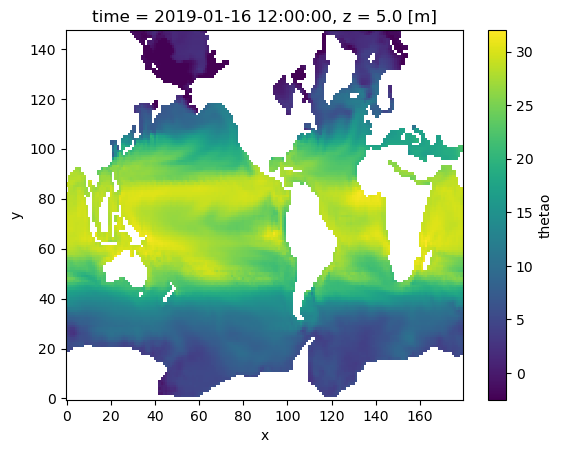

In [61]:
ds['thetao'].isel(time=0,z=0).plot(vmin=-2.5,vmax=32)

In [24]:
# read the unperturbed field
from osprey.actions.reader import reader_nemo_field
ds0 = reader_nemo_field(expname='pi00', startyear=1990, endyear=2040, varname='thetao')

2025-01-21 09:51:39,955 - INFO - Data available in the range 1990-2040.


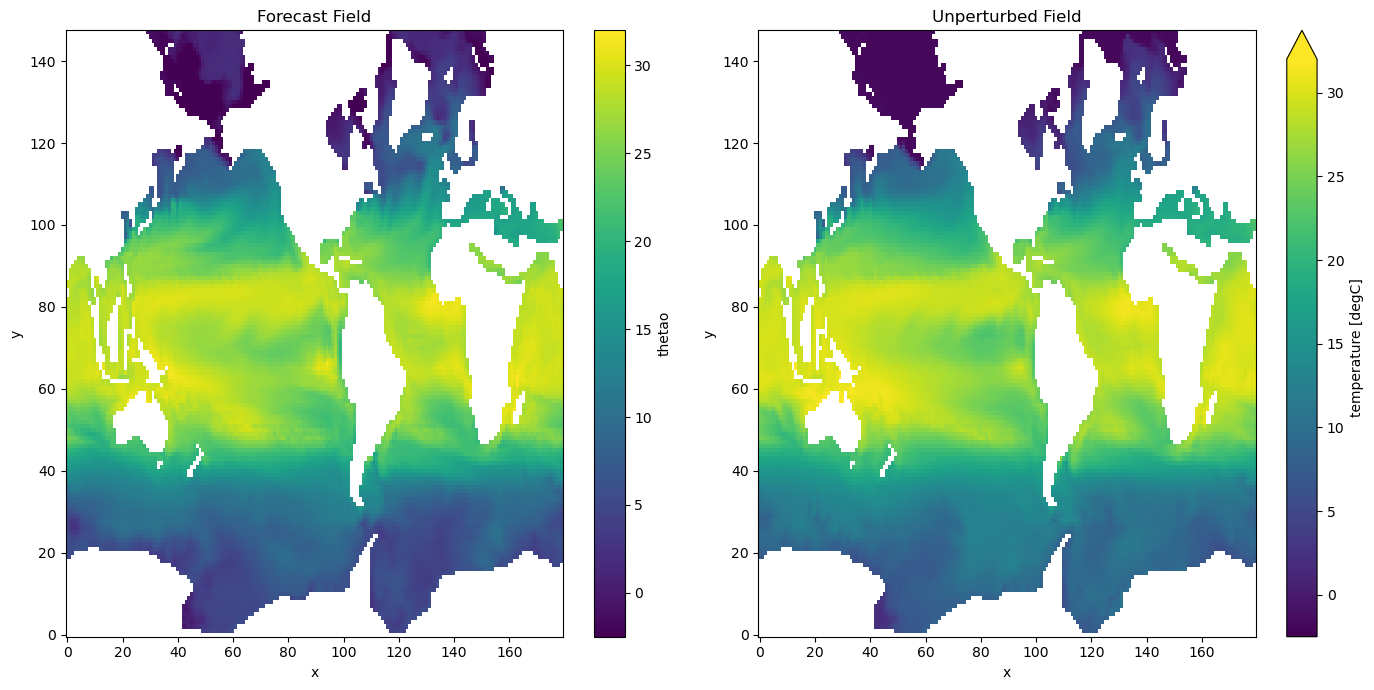

In [85]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 7))

# Plot ds
ds['thetao'].isel(time=0, z=0).plot(ax=axes[0], vmin=-2.5, vmax=32)
axes[0].set_title('Forecast Field')

# Plot ds0
ds0.sel(time=slice('20190101', '20190131')).isel(z=0).plot(ax=axes[1], vmin=-2.5, vmax=32)
axes[1].set_title('Unperturbed Field')

plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'x,y,z = [130, 20, 0]')

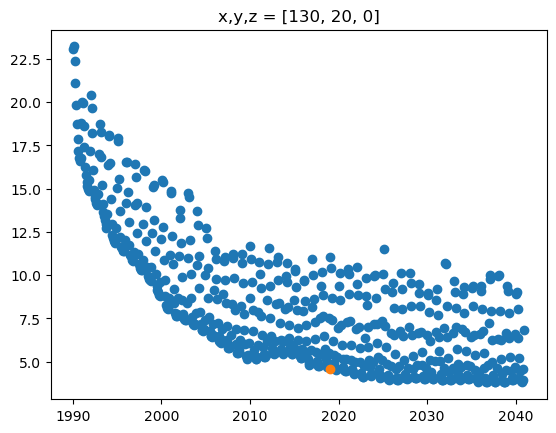

In [69]:
# plot the forecast and the unpertubed on a random spot (x,y,z)

import random
from osprey.utils.time import get_decimal_year

x0=random.randint(0, 179)
y0=random.randint(0, 147)
z0=random.randint(0, 30)

x0=130
y0=20
z0=0

yr = ds0.isel(z=z0,y=y0,x=x0).values
xr = get_decimal_year(ds0['time'].values)

xx = get_decimal_year(ds['time'].values)
yy = ds['thetao'].isel(time=0,z=z0,y=y0,x=x0).values

plt.scatter(x=xr, y=yr)
plt.scatter(x=xx, y=yy)
plt.title('x,y,z = {}'.format([x0,y0,z0]))

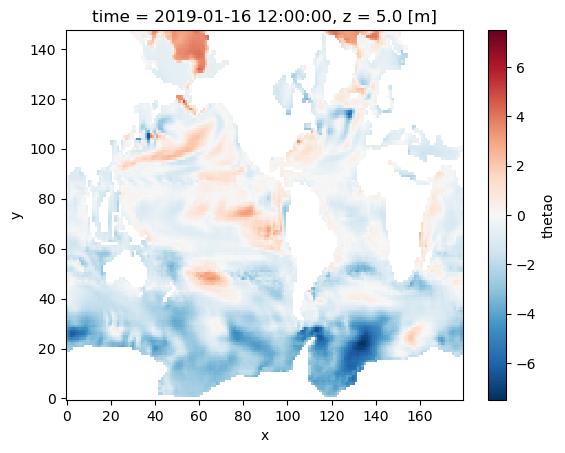

In [59]:
# compute the difference between the forecast and the unperturbed field

delta=ds['thetao'].isel(time=0)-ds0.sel(time=slice('20190101', '20190131'))
delta.isel(z=0).plot()

Text(0, 0.5, 'PDF')

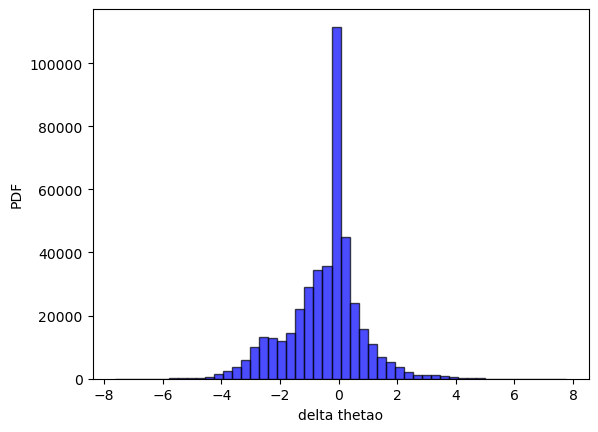

In [39]:
# histogram of the difference

plt.hist(delta.values.flatten(), bins=50, color='blue', alpha=0.7, edgecolor='black')
plt.xlabel('delta thetao')
plt.ylabel('PDF')

Text(0, 0.5, 'PDF')

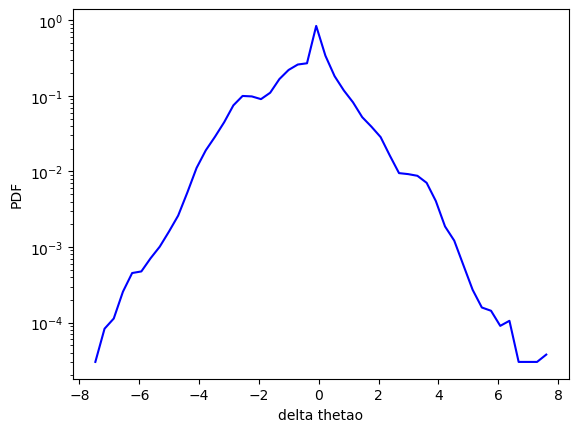

In [40]:
# histrogram in log scale

import numpy as np

flattened_delta = delta.values.flatten()
filtered_delta = flattened_delta[~np.isnan(flattened_delta) & ~np.isinf(flattened_delta)]
density, bins = np.histogram(filtered_delta, bins=50, density=True)
bin_centers = 0.5 * (bins[1:] + bins[:-1])
plt.plot(bin_centers, density, label="full EOFs", color="blue")
plt.yscale('log')
plt.xlabel('delta thetao')
plt.ylabel('PDF')

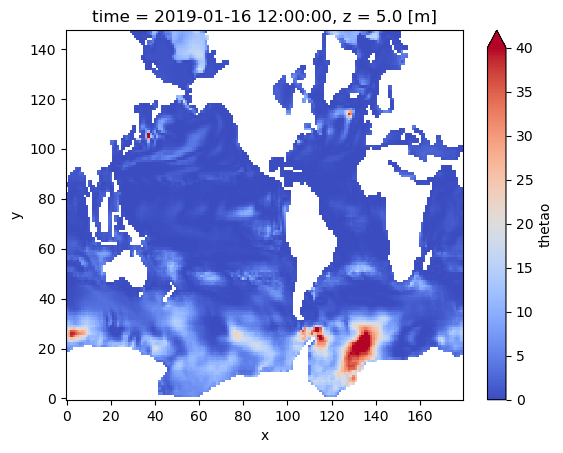

In [43]:
# squared error

sqerr = delta**2
sqerr.isel(z=0).plot(cmap=plt.cm.coolwarm, vmin=0, vmax=40)

Text(0, 0.5, 'PDF')

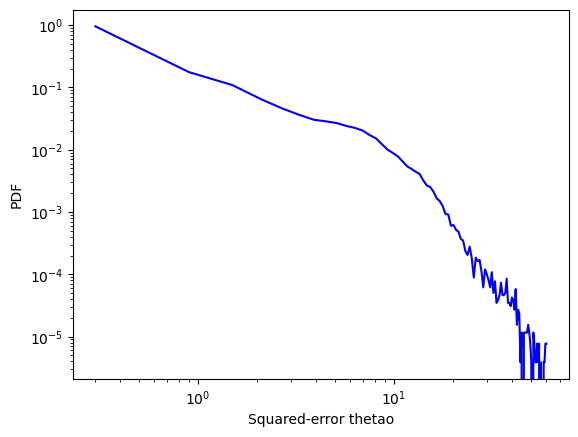

In [44]:
# histogram of squared error

flattened_delta = sqerr.values.flatten()
filtered_delta = flattened_delta[~np.isnan(flattened_delta) & ~np.isinf(flattened_delta)]
density, bins = np.histogram(filtered_delta, bins=100, density=True)
bin_centers = 0.5 * (bins[1:] + bins[:-1])

plt.plot(bin_centers, density, label="full EOFs", color="blue")
plt.yscale('log')
plt.xscale('log')
plt.xlabel('Squared-error thetao')
plt.ylabel('PDF')

In [90]:
ds10 = create_forecast_field(expname='TS01', varname='thetao', endleg=21, yearspan=10, yearleap=10, mode='first', smoothing=False, debug=False)

2025-01-21 11:28:37,499 - INFO - Start/end year: 2000-2009
2025-01-21 11:28:37,526 - INFO - Time window: 10
2025-01-21 11:28:37,533 - INFO - File /ec/res4/scratch/itas/martini/TS01/021/data.nc successfully removed.


/ec/res4/scratch/itas/ece4/TS01/output/nemo/TS01_oce_1m_T_2000-2000.nc
/ec/res4/scratch/itas/ece4/TS01/output/nemo/TS01_oce_1m_T_2001-2001.nc
/ec/res4/scratch/itas/ece4/TS01/output/nemo/TS01_oce_1m_T_2002-2002.nc
/ec/res4/scratch/itas/ece4/TS01/output/nemo/TS01_oce_1m_T_2003-2003.nc
/ec/res4/scratch/itas/ece4/TS01/output/nemo/TS01_oce_1m_T_2004-2004.nc
/ec/res4/scratch/itas/ece4/TS01/output/nemo/TS01_oce_1m_T_2005-2005.nc
/ec/res4/scratch/itas/ece4/TS01/output/nemo/TS01_oce_1m_T_2006-2006.nc
/ec/res4/scratch/itas/ece4/TS01/output/nemo/TS01_oce_1m_T_2007-2007.nc
/ec/res4/scratch/itas/ece4/TS01/output/nemo/TS01_oce_1m_T_2008-2008.nc
/ec/res4/scratch/itas/ece4/TS01/output/nemo/TS01_oce_1m_T_2009-2009.nc


2025-01-21 11:29:54,874 - INFO - Execution of cat finished.
2025-01-21 11:29:54,946 - INFO - File /ec/res4/scratch/itas/martini/TS01/021/thetao.nc successfully removed.
2025-01-21 11:30:20,675 - INFO - Execution of selname finished.
2025-01-21 11:30:20,742 - INFO - File /ec/res4/scratch/itas/martini/TS01/021/thetao_timmean.nc not found.
2025-01-21 11:30:32,037 - INFO - Execution of timmean finished.
2025-01-21 11:30:32,089 - INFO - Execution of merge finished.
2025-01-21 11:30:32,090 - INFO - File /ec/res4/scratch/itas/martini/TS01/021/thetao_anomaly.nc successfully removed.
2025-01-21 11:30:32,091 - INFO - Detrending variable thetao by subtracting the time average.
2025-01-21 11:30:41,683 - INFO - Execution of detrend finished.
2025-01-21 11:30:41,745 - INFO - File /ec/res4/scratch/itas/martini/TS01/021/thetao_variance.nc successfully removed.
2025-01-21 11:30:41,745 - INFO - File /ec/res4/scratch/itas/martini/TS01/021/thetao_pattern.nc successfully removed.
2025-01-21 11:30:41,746 - 

In [91]:
delta3=ds10['thetao'].isel(time=0)-ds0.sel(time=slice('20190101', '20190131'))
sqerr3 = delta3**2

In [70]:
# create 10-year forecast in the future in first mode
ds1 = create_forecast_field(expname='TS01', varname='thetao', endleg=21, yearspan=20, yearleap=20, mode='first', smoothing=False, debug=False)

2025-01-21 10:36:22,101 - INFO - Start/end year: 1990-2009
2025-01-21 10:36:22,104 - INFO - Time window: 20


/ec/res4/scratch/itas/ece4/TS01/output/nemo/TS01_oce_1m_T_1990-1990.nc
/ec/res4/scratch/itas/ece4/TS01/output/nemo/TS01_oce_1m_T_1991-1991.nc
/ec/res4/scratch/itas/ece4/TS01/output/nemo/TS01_oce_1m_T_1992-1992.nc
/ec/res4/scratch/itas/ece4/TS01/output/nemo/TS01_oce_1m_T_1993-1993.nc
/ec/res4/scratch/itas/ece4/TS01/output/nemo/TS01_oce_1m_T_1994-1994.nc
/ec/res4/scratch/itas/ece4/TS01/output/nemo/TS01_oce_1m_T_1995-1995.nc
/ec/res4/scratch/itas/ece4/TS01/output/nemo/TS01_oce_1m_T_1996-1996.nc
/ec/res4/scratch/itas/ece4/TS01/output/nemo/TS01_oce_1m_T_1997-1997.nc


2025-01-21 10:36:22,461 - INFO - File /ec/res4/scratch/itas/martini/TS01/021/data.nc successfully removed.


/ec/res4/scratch/itas/ece4/TS01/output/nemo/TS01_oce_1m_T_1998-1998.nc
/ec/res4/scratch/itas/ece4/TS01/output/nemo/TS01_oce_1m_T_1999-1999.nc
/ec/res4/scratch/itas/ece4/TS01/output/nemo/TS01_oce_1m_T_2000-2000.nc
/ec/res4/scratch/itas/ece4/TS01/output/nemo/TS01_oce_1m_T_2001-2001.nc
/ec/res4/scratch/itas/ece4/TS01/output/nemo/TS01_oce_1m_T_2002-2002.nc
/ec/res4/scratch/itas/ece4/TS01/output/nemo/TS01_oce_1m_T_2003-2003.nc
/ec/res4/scratch/itas/ece4/TS01/output/nemo/TS01_oce_1m_T_2004-2004.nc
/ec/res4/scratch/itas/ece4/TS01/output/nemo/TS01_oce_1m_T_2005-2005.nc
/ec/res4/scratch/itas/ece4/TS01/output/nemo/TS01_oce_1m_T_2006-2006.nc
/ec/res4/scratch/itas/ece4/TS01/output/nemo/TS01_oce_1m_T_2007-2007.nc
/ec/res4/scratch/itas/ece4/TS01/output/nemo/TS01_oce_1m_T_2008-2008.nc
/ec/res4/scratch/itas/ece4/TS01/output/nemo/TS01_oce_1m_T_2009-2009.nc


2025-01-21 10:38:13,855 - INFO - Execution of cat finished.
2025-01-21 10:38:13,921 - INFO - File /ec/res4/scratch/itas/martini/TS01/021/thetao.nc successfully removed.
2025-01-21 10:38:39,866 - INFO - Execution of selname finished.
2025-01-21 10:38:39,906 - INFO - File /ec/res4/scratch/itas/martini/TS01/021/thetao_timmean.nc not found.
2025-01-21 10:38:44,206 - INFO - Execution of timmean finished.
2025-01-21 10:38:44,216 - INFO - Execution of merge finished.
2025-01-21 10:38:44,216 - INFO - File /ec/res4/scratch/itas/martini/TS01/021/thetao_anomaly.nc successfully removed.
2025-01-21 10:38:44,217 - INFO - Detrending variable thetao by subtracting the time average.
2025-01-21 10:38:46,376 - INFO - Execution of detrend finished.
2025-01-21 10:38:46,383 - INFO - File /ec/res4/scratch/itas/martini/TS01/021/thetao_variance.nc successfully removed.
2025-01-21 10:38:46,384 - INFO - File /ec/res4/scratch/itas/martini/TS01/021/thetao_pattern.nc successfully removed.
2025-01-21 10:38:46,384 - 

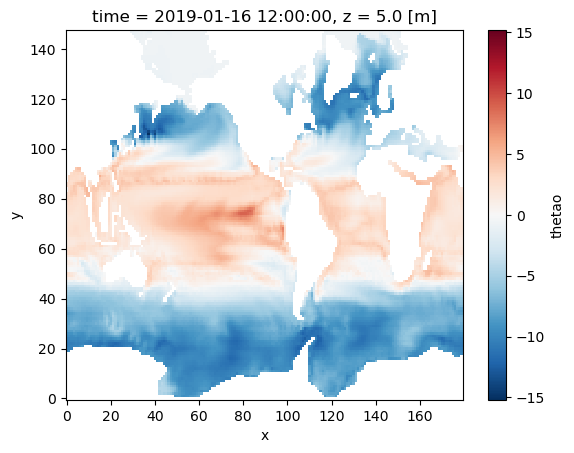

In [71]:
# compute the difference between the forecast and the unperturbed field

delta1=ds1['thetao'].isel(time=0)-ds0.sel(time=slice('20190101', '20190131'))
sqerr1 = delta1**2
delta1.isel(z=0).plot()
#sqerr1.isel(z=0).plot(cmap=plt.cm.coolwarm)

In [73]:
# create 10-year forecast in the future in first mode
ds2 = create_forecast_field(expname='TS02', varname='thetao', endleg=21, yearspan=10, yearleap=20, mode='first', smoothing=False, debug=False)

2025-01-21 10:52:30,249 - INFO - Start/end year: 2000-2009
2025-01-21 10:52:30,252 - INFO - Time window: 10


/ec/res4/scratch/itas/ece4/TS02/output/nemo/TS02_oce_1m_T_2000-2000.nc
/ec/res4/scratch/itas/ece4/TS02/output/nemo/TS02_oce_1m_T_2001-2001.nc
/ec/res4/scratch/itas/ece4/TS02/output/nemo/TS02_oce_1m_T_2002-2002.nc
/ec/res4/scratch/itas/ece4/TS02/output/nemo/TS02_oce_1m_T_2003-2003.nc
/ec/res4/scratch/itas/ece4/TS02/output/nemo/TS02_oce_1m_T_2004-2004.nc


2025-01-21 10:52:32,672 - INFO - File /ec/res4/scratch/itas/martini/TS02/021/data.nc not found.


/ec/res4/scratch/itas/ece4/TS02/output/nemo/TS02_oce_1m_T_2005-2005.nc
/ec/res4/scratch/itas/ece4/TS02/output/nemo/TS02_oce_1m_T_2006-2006.nc
/ec/res4/scratch/itas/ece4/TS02/output/nemo/TS02_oce_1m_T_2007-2007.nc
/ec/res4/scratch/itas/ece4/TS02/output/nemo/TS02_oce_1m_T_2008-2008.nc
/ec/res4/scratch/itas/ece4/TS02/output/nemo/TS02_oce_1m_T_2009-2009.nc


2025-01-21 10:53:45,293 - INFO - Execution of cat finished.
2025-01-21 10:53:45,506 - INFO - File /ec/res4/scratch/itas/martini/TS02/021/thetao.nc not found.
2025-01-21 10:54:09,779 - INFO - Execution of selname finished.
2025-01-21 10:54:09,842 - INFO - File /ec/res4/scratch/itas/martini/TS02/021/thetao_timmean.nc not found.
2025-01-21 10:54:19,274 - INFO - Execution of timmean finished.
2025-01-21 10:54:19,311 - INFO - Execution of merge finished.
2025-01-21 10:54:19,317 - INFO - File /ec/res4/scratch/itas/martini/TS02/021/thetao_anomaly.nc not found.
2025-01-21 10:54:19,318 - INFO - Detrending variable thetao by subtracting the time average.
2025-01-21 10:54:27,709 - INFO - Execution of detrend finished.
2025-01-21 10:54:27,751 - INFO - File /ec/res4/scratch/itas/martini/TS02/021/thetao_variance.nc not found.
2025-01-21 10:54:27,754 - INFO - File /ec/res4/scratch/itas/martini/TS02/021/thetao_pattern.nc not found.
2025-01-21 10:54:27,756 - INFO - Computing EOFs for variable thetao wi

In [74]:
delta2=ds2['thetao'].isel(time=0)-ds0.sel(time=slice('20190101', '20190131'))
sqerr2 = delta2**2

Text(0, 0.5, 'PDF')

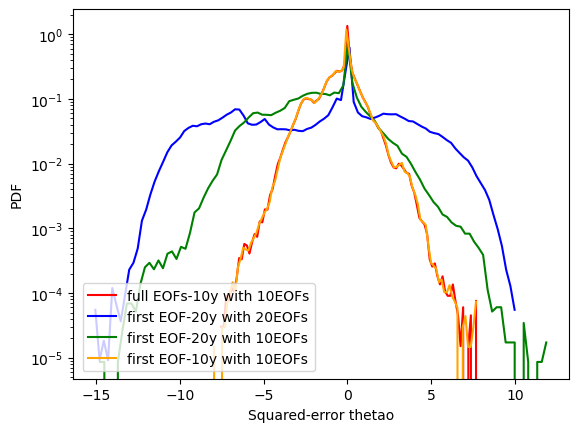

In [92]:
# histogram of squared error

flattened_delta = delta.values.flatten()
filtered_delta = flattened_delta[~np.isnan(flattened_delta) & ~np.isinf(flattened_delta)]
density, bins = np.histogram(filtered_delta, bins=100, density=True)
bin_centers = 0.5 * (bins[1:] + bins[:-1])

flattened_delta1 = delta1.values.flatten()
filtered_delta1 = flattened_delta1[~np.isnan(flattened_delta1) & ~np.isinf(flattened_delta1)]
density1, bins1 = np.histogram(filtered_delta1, bins=100, density=True)
bin_centers1 = 0.5 * (bins1[1:] + bins1[:-1])

flattened_delta2 = delta2.values.flatten()
filtered_delta2 = flattened_delta2[~np.isnan(flattened_delta2) & ~np.isinf(flattened_delta2)]
density2, bins2 = np.histogram(filtered_delta2, bins=100, density=True)
bin_centers2 = 0.5 * (bins2[1:] + bins2[:-1])

flattened_delta3 = delta3.values.flatten()
filtered_delta3 = flattened_delta3[~np.isnan(flattened_delta3) & ~np.isinf(flattened_delta3)]
density3, bins3 = np.histogram(filtered_delta3, bins=100, density=True)
bin_centers3 = 0.5 * (bins3[1:] + bins3[:-1])

plt.plot(bin_centers, density, label="full EOFs-10y with 10EOFs", color="red")
plt.plot(bin_centers1, density1, label="first EOF-20y with 20EOFs", color="blue")
plt.plot(bin_centers2, density2, label="first EOF-20y with 10EOFs", color="green")
plt.plot(bin_centers3, density3, label="first EOF-10y with 10EOFs", color="orange")

plt.legend(
    bbox_to_anchor=(0.02, 0.02),  # x, y coordinates for legend placement
    loc='lower left',         # Location of the legend relative to bbox_to_anchor
    borderaxespad=0           # Padding between the legend and the plot
)

plt.yscale('log')
#plt.xscale('log')
plt.xlabel('Squared-error thetao')
plt.ylabel('PDF')

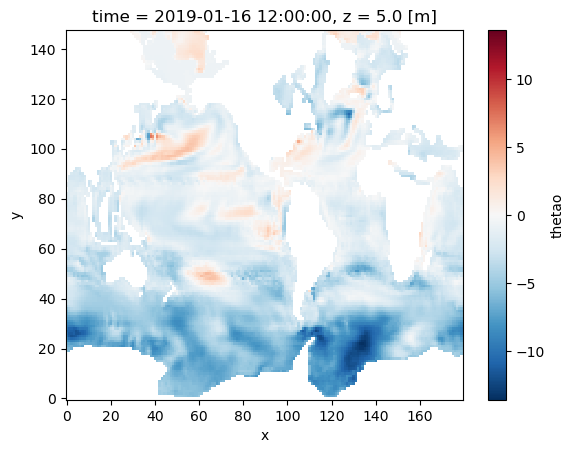

In [84]:
delta2=ds2['thetao'].isel(time=0)-ds0.sel(time=slice('20190101', '20190131'))
sqerr2 = delta2**2
delta2.isel(z=0).plot()